# <font color = 'purple'>Masking images</font>
Now let us try something even cooler... a mask that is in shape of a circular disc.

![](../Week-3-2-numpy_satellite/Screenshot_3.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as img # Library to get image

In [2]:
photo_data = img.imread('../Week-3-2-numpy_satellite/wifire/sd-3layers.jpg')

> Далее теперь мы будем использовать функцию **ogrid** чтобы помочь нам векторизовать расстояние от центра.<br>
  Так что огрид это компактный метод создания многомерных операций ndarray в одних строках.

In [3]:
total_rows, total_cols, total_layers = photo_data.shape
#print(f'photo_data = {photo_data.shape}')

X, Y = np.ogrid[: total_rows, : total_cols]
#print(f'X = {X.shape} and Y = {Y.shape}')

In [4]:
center_row, center_col = total_rows / 2, total_cols / 2

#print('=======================================================')
#print(f'center_row = {center_row} and center_col = {center_col}')
#print('=======================================================')
#print(X - center_row)
#print('=======================================================')
#print(Y - center_row)
#print('=======================================================')

dist_from_center = (X - center_row) ** 2 + (Y - center_col) ** 2

#print(dist_from_center)
#print('=======================================================')

radius = (total_rows / 2) ** 2

#print(f'Radius = {radius}')
#print('=======================================================')

circular_mask = (dist_from_center > radius)

#print(circular_mask)
#print('=======================================================')
#print(circular_mask[1500 : 1700, 2000 : 2200])
#print('=======================================================')

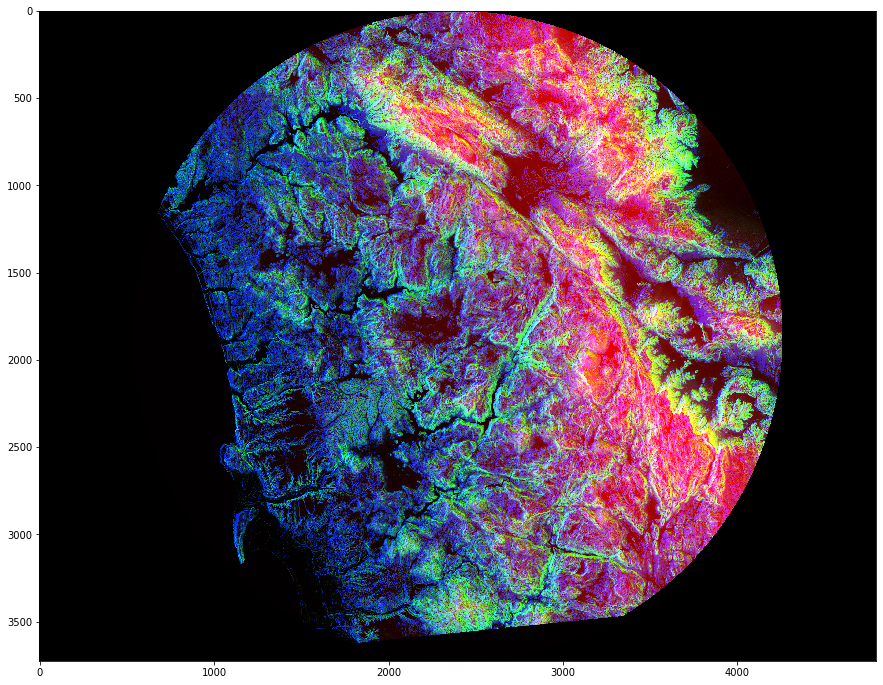

In [5]:
photo_data = img.imread('../Week-3-2-numpy_satellite/wifire/sd-3layers.jpg')
photo_data[circular_mask] = 0

plt.figure(figsize=(15,15))
plt.imshow(photo_data)

## <font color = 'purple'>Further masking</font>
You can further improve the mask, for example just get upper half disc.

In [6]:
X, Y = np.ogrid[:total_rows, :total_cols]
half_upper = X < center_row # this line generates a mask for all rows above

half_upper_mask = np.logical_and(half_upper, circular_mask)

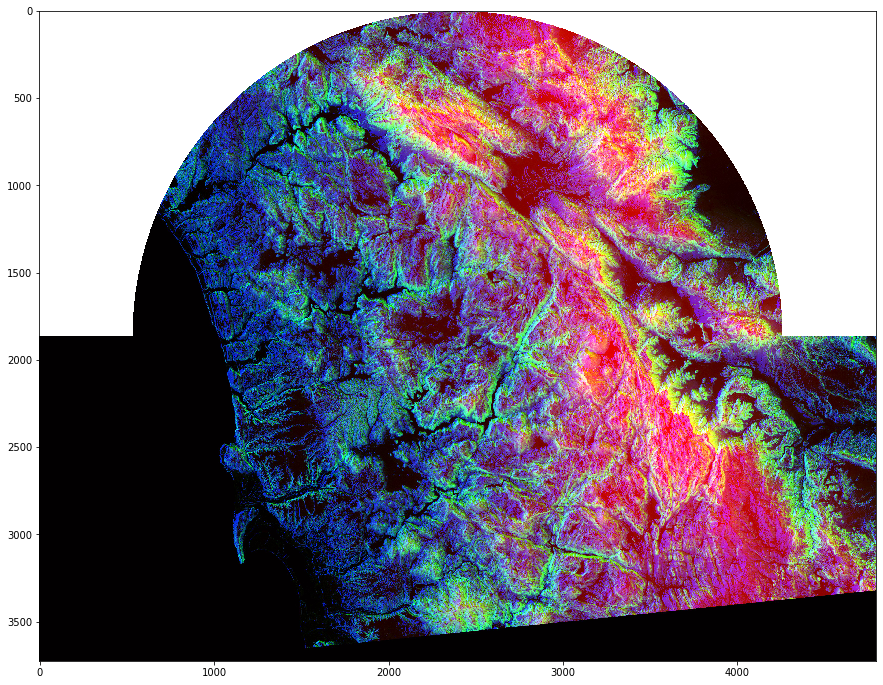

In [7]:
import random

photo_data = img.imread('../Week-3-2-numpy_satellite/wifire/sd-3layers.jpg')
photo_data[half_upper_mask] = 255

#photo_data[half_upper_mask] = random.randint(200, 255)

plt.figure(figsize=(15,15))
plt.imshow(photo_data)

## <font color = 'purple'>Further processing of our satellite imagery</font>
### <font color = 'blue'>Processing of RED pixels</font>
Remember that red pixels tell us about the height. Let us try to highlight all the high altitude areas.<br>
We will do this by detecting high intensity RED Pixels and muting down other areas.

## <font color = 'red'>Detecting high - RED pixels</font>

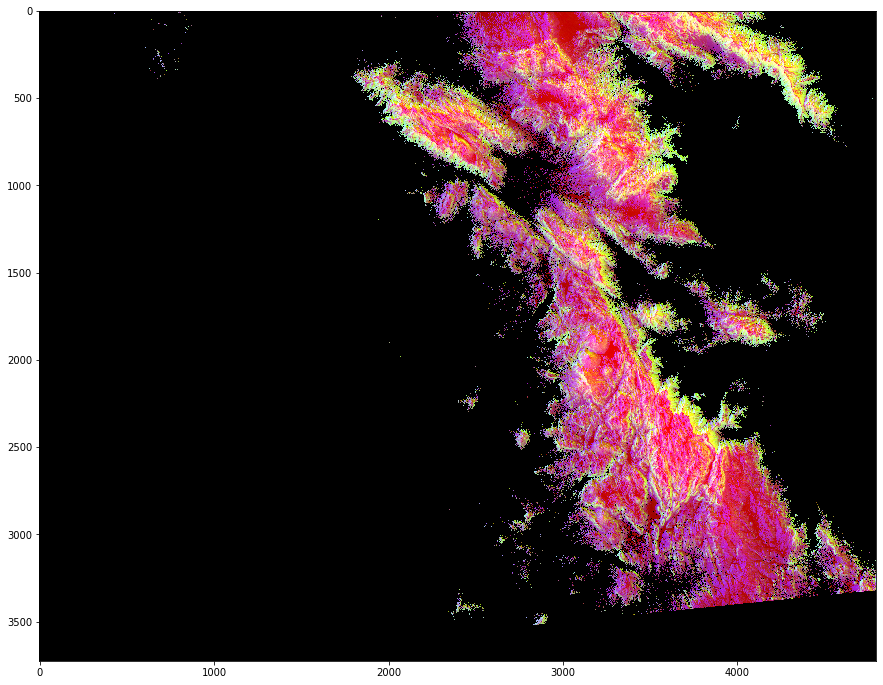

In [8]:
photo_data = img.imread('../Week-3-2-numpy_satellite/wifire/sd-3layers.jpg')
red_mask = photo_data[:, :, 0] < 150

photo_data[red_mask] = 0

plt.figure(figsize=(15, 15))
plt.imshow(photo_data)

Изображение изменилось потому что остались только точки на изображении у которых была красная интенсивность 150 или выше.

## <font color = 'green'>Detecting high - GREEN pixels</font>

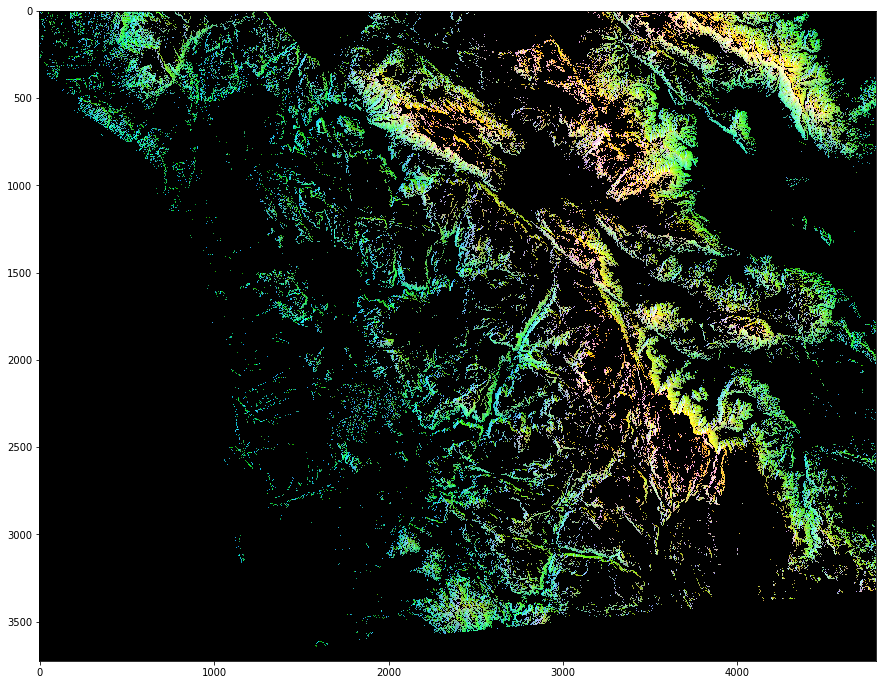

In [9]:
photo_data = img.imread('../Week-3-2-numpy_satellite/wifire/sd-3layers.jpg')
red_mask = photo_data[:, :, 1] < 150

photo_data[red_mask] = 0

plt.figure(figsize=(15, 15))
plt.imshow(photo_data)

## <font color = 'blue'>Detecting high - BLUE pixels</font>

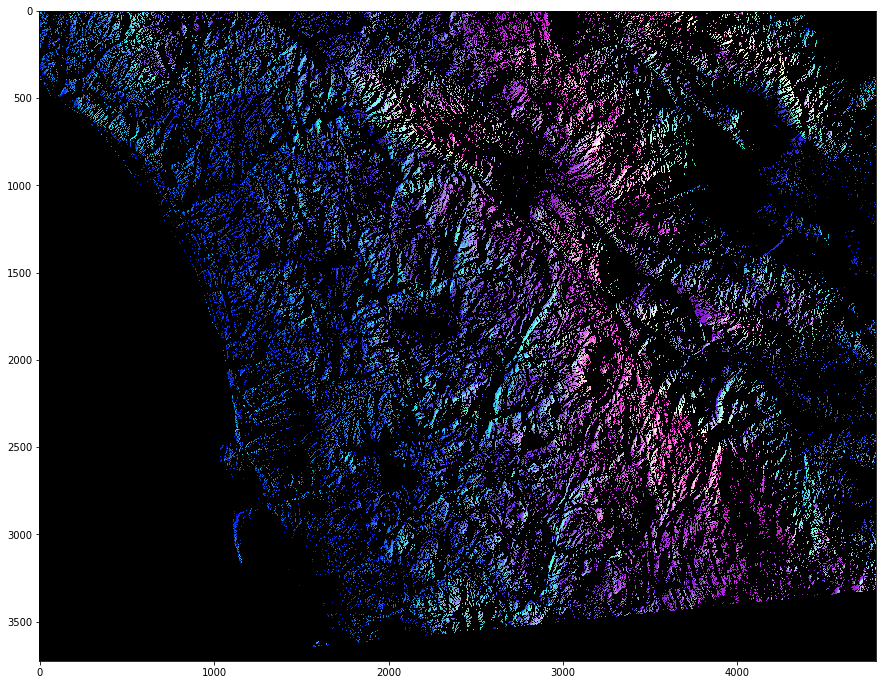

In [10]:
photo_data = img.imread('../Week-3-2-numpy_satellite/wifire/sd-3layers.jpg')
red_mask = photo_data[:, :, 2] < 190

photo_data[red_mask] = 0

plt.figure(figsize=(15, 15))
plt.imshow(photo_data)

## <font color = 'purple'>Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE</font>

final_mask объединит эти три(red, green, blue _mask) используя функцию logic_and.

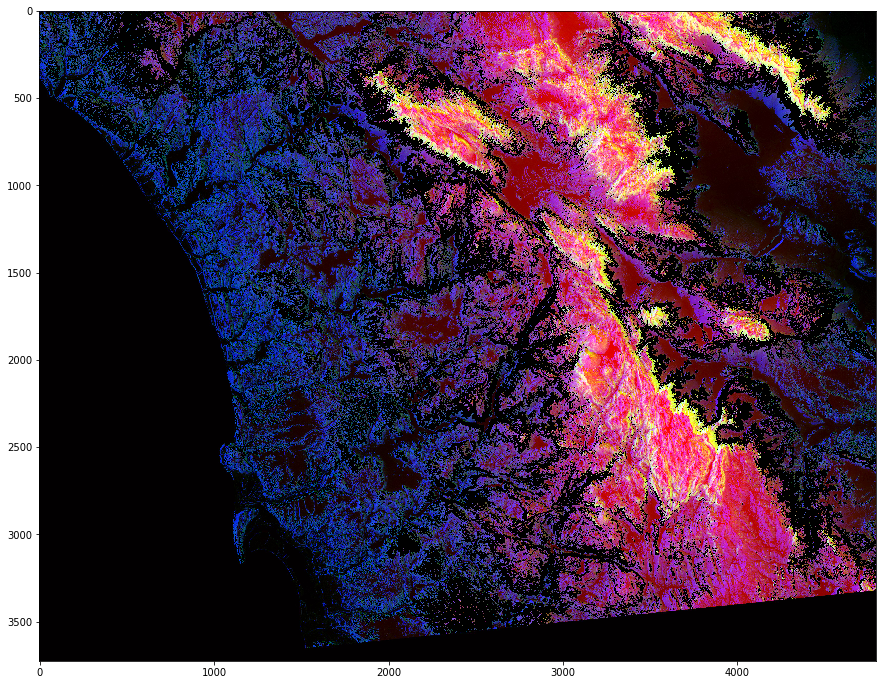

In [21]:
photo_data = img.imread('../Week-3-2-numpy_satellite/wifire/sd-3layers.jpg')

red_mask = photo_data[:, :, 0] < 190
green_mask = photo_data[:, :, 1] > 100
blue_mask = photo_data[:, :, 2] < 190

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0

plt.figure(figsize=(15,15))
plt.imshow(photo_data)